In [1]:
#Cargar librerias
import tensorflow as tf
import numpy as np
import datetime

import tensorflow_hub as hub

print(tf.__version__)
import time

import matplotlib.pylab as plt
import os
import shutil
import random

2.10.0


In [2]:
# Ruta de la carpeta principal que contiene las subcarpetas de clases
folder_path = "../Data/PetroImages_Augmentedx2"

# Rutas para los subconjuntos de entrenamiento y validación
train_dir = "../Data/PetroImages_x2ST/train"
validation_dir = "../Data/PetroImages_x2ST/validation"

In [3]:
#Preparar dataset
# Proporción de datos para el conjunto de validación (porcentaje)
validation_split = 0.2
random.seed(123)

# Lista de las subcarpetas/clases
class_folders = os.listdir(folder_path)

# Itera a través de cada subcarpeta/clase
for class_folder in class_folders:
    class_path = os.path.join(folder_path, class_folder)
    if os.path.isdir(class_path):
        # Lista de archivos en la subcarpeta actual
        files = os.listdir(class_path)
        # Baraja (shuffle) los archivos de la clase para dividir aleatoriamente
        random.shuffle(files)
        # Calcula la cantidad de datos para el conjunto de validación
        num_validation = int(len(files) * validation_split)
        if num_validation == 0:
            num_validation = 1
        # Divide los archivos en los conjuntos de entrenamiento y validación
        train_files = files[num_validation:]
        validation_files = files[:num_validation]
        

        # Crea las rutas para las carpetas de entrenamiento y validación
        class_train_dir = os.path.join(train_dir, class_folder)
        class_validation_dir = os.path.join(validation_dir, class_folder)

        # Crea las carpetas de entrenamiento y validación si no existen
        os.makedirs(class_train_dir, exist_ok=True)
        os.makedirs(class_validation_dir, exist_ok=True)
        
        # Mueve los archivos a las carpetas correspondientes
        for file in train_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(class_train_dir, file)
            shutil.copy(src, dst)

        for file in validation_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(class_validation_dir, file)
            shutil.copy(src, dst)

In [4]:
#Cargar dataset
#Dividir dataset para entrenamiento y validación  
BATCH_SIZE = 32
IMG_SIZE = (299, 299)

# Crea el conjunto de datos de TensorFlow desde los directorios
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            seed = 123,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 seed = 123,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 13115 files belonging to 106 classes.
Found 3242 files belonging to 106 classes.


In [5]:

training_data = train_ds
validation_data = val_ds

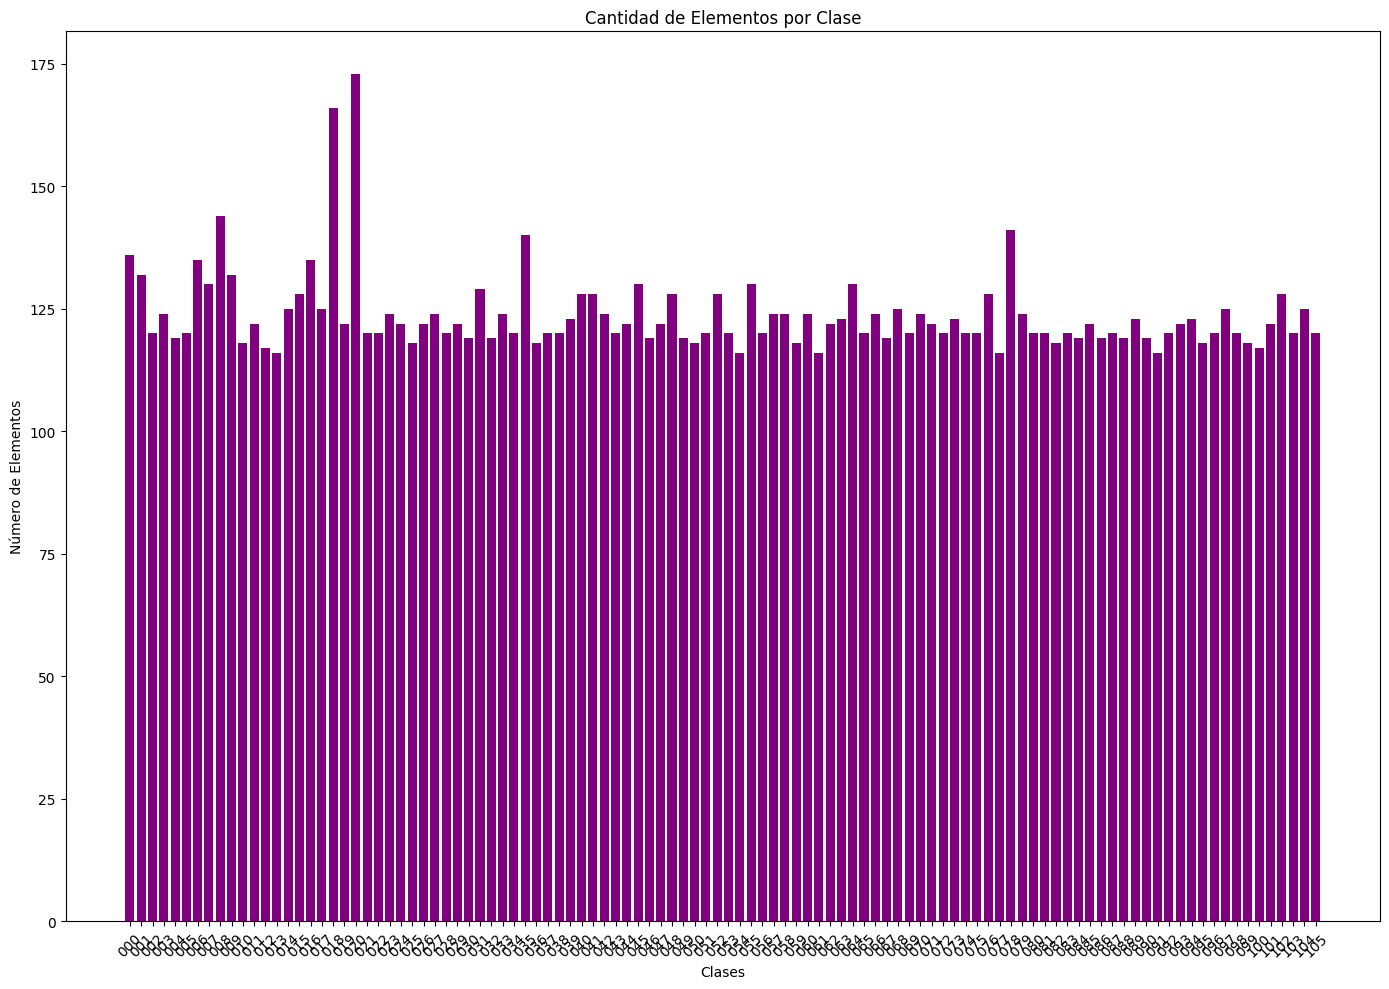

In [6]:
import matplotlib.pyplot as plt

# Lista de nombres de las clases
class_names = np.array(train_ds.class_names)

# Ruta de la carpeta principal
folder_path = train_dir 

# Listas para almacenar los nombres de las clases y la cantidad de elementos
class_names_list = []
element_count_list = []

# Itera a través de cada clase
for class_name in class_names:
    class_folder = os.path.join(folder_path, class_name)
    if os.path.exists(class_folder) and os.path.isdir(class_folder):
        # Obtiene la lista de elementos en la carpeta de la clase
        elements = os.listdir(class_folder)
        element_count = len(elements)
        class_names_list.append(class_name)
        element_count_list.append(element_count)

# Crea un gráfico de barras
plt.figure(figsize=(14, 10))
plt.bar(class_names_list, element_count_list, color='purple')
plt.xlabel('Clases')
plt.ylabel('Número de Elementos')
plt.title('Cantidad de Elementos por Clase')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [7]:
std = np.std(element_count_list)
mean = np.mean(element_count_list)

print('Desviación estándar: ', std)
print('Media: ', mean)

cv = std/mean 
print('Coeficiente de variacion: ', cv)

Desviación estándar:  8.31404020359187
Media:  123.72641509433963
Coeficiente de variacion:  0.06719697000234374


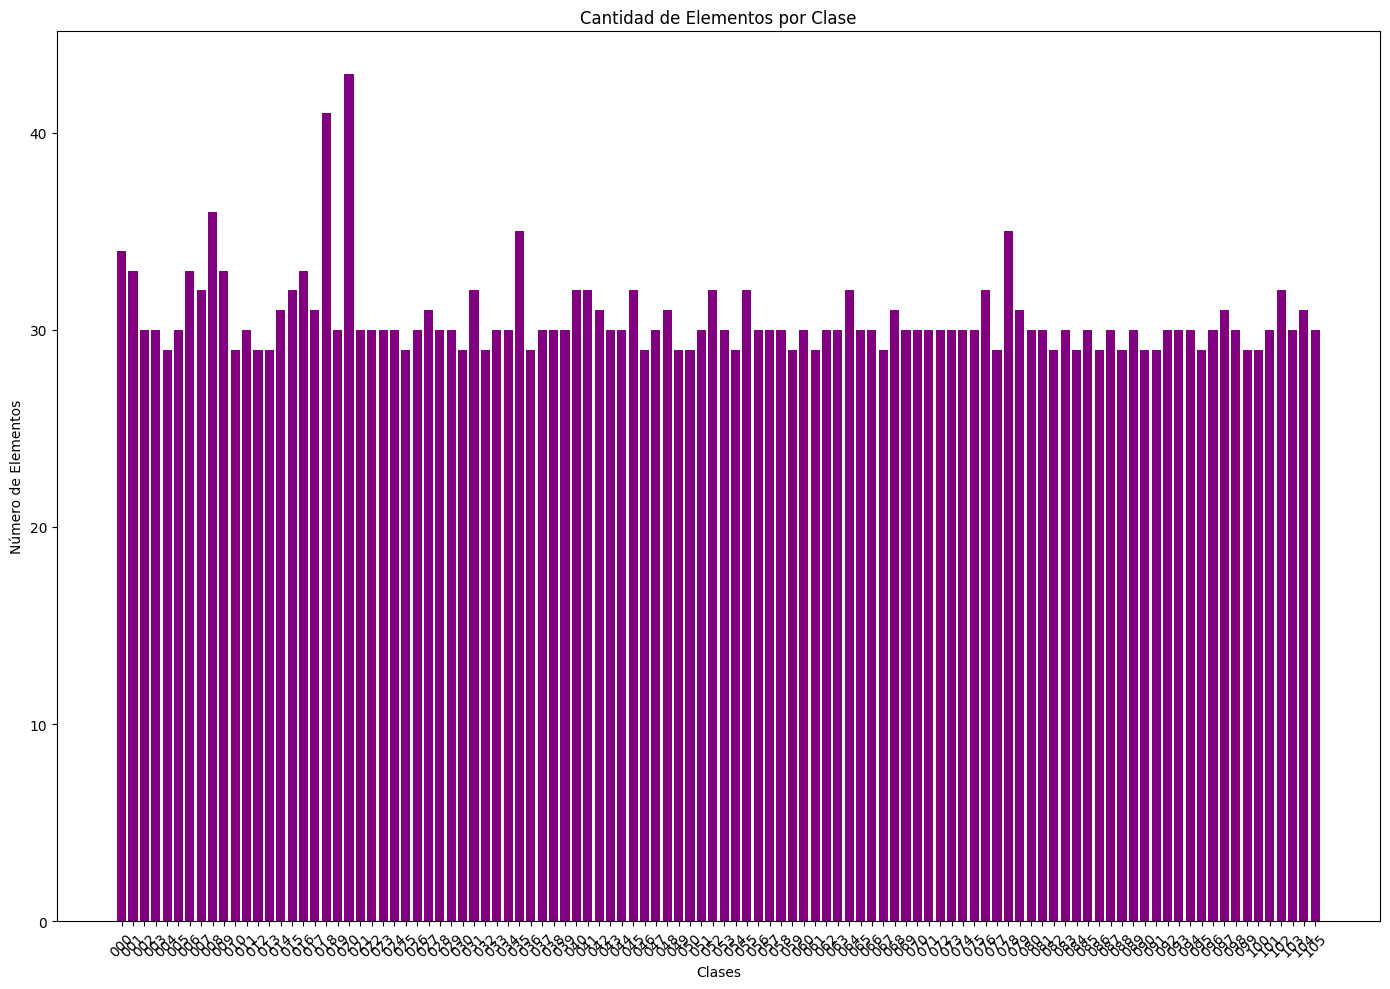

In [8]:
import matplotlib.pyplot as plt

# Lista de nombres de las clases
class_names = np.array(val_ds.class_names)

# Ruta de la carpeta principal
folder_path = validation_dir  # Reemplaza con tu ruta

# Listas para almacenar los nombres de las clases y la cantidad de elementos
class_names_list = []
element_count_list = []

# Itera a través de cada clase
for class_name in class_names:
    class_folder = os.path.join(folder_path, class_name)
    if os.path.exists(class_folder) and os.path.isdir(class_folder):
        # Obtiene la lista de elementos en la carpeta de la clase
        elements = os.listdir(class_folder)
        element_count = len(elements)
        class_names_list.append(class_name)
        element_count_list.append(element_count)

# Crea un gráfico de barras
plt.figure(figsize=(14, 10))
plt.bar(class_names_list, element_count_list, color='purple')
plt.xlabel('Clases')
plt.ylabel('Número de Elementos')
plt.title('Cantidad de Elementos por Clase')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [9]:
std = np.std(element_count_list)
mean = np.mean(element_count_list)

print('Desviación estándar: ', std)
print('Media: ', mean)

cv = std/mean 
print('Coeficiente de variacion: ', cv)

Desviación estándar:  2.1051057631669967
Media:  30.58490566037736
Coeficiente de variacion:  0.06882825752489255


In [10]:
class_names = np.array(train_ds.class_names)
print(class_names)

['000' '001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011'
 '012' '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023'
 '024' '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035'
 '036' '037' '038' '039' '040' '041' '042' '043' '044' '045' '046' '047'
 '048' '049' '050' '051' '052' '053' '054' '055' '056' '057' '058' '059'
 '060' '061' '062' '063' '064' '065' '066' '067' '068' '069' '070' '071'
 '072' '073' '074' '075' '076' '077' '078' '079' '080' '081' '082' '083'
 '084' '085' '086' '087' '088' '089' '090' '091' '092' '093' '094' '095'
 '096' '097' '098' '099' '100' '101' '102' '103' '104' '105']


In [11]:
#Normalizar datasets
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [12]:
#Mejorar rendimiento 
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [13]:
#Imprimir las formas de los lotes de imágenes y etiquetas
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 299, 299, 3)
(32,)


In [14]:
#Cargar modelo de extracción de características
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor_model  = inception_v3

In [15]:
#Crear capa Keras a partir de un modelo de extracción de características
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape = (299, 299, 3),
    trainable = False)

In [16]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [17]:
#Construir modelo
num_classes = len(class_names)

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 106)               217194    
                                                                 
Total params: 22,019,978
Trainable params: 217,194
Non-trainable params: 21,802,784
_________________________________________________________________


In [18]:
#Compilar modelo
model.compile(
  optimizer = tf.keras.optimizers.Adam(),
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ['acc'])

log_dir = "Logs/Inception_x2/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.

In [19]:
#Definir epocas
num_epochs = 50

In [20]:
#Entrenar el modelo utilizando los conjuntos de datos de entrenamiento y validación.
#Registro de TensorBoard para el seguimiento del progreso del entrenamiento.
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = num_epochs,
                    callbacks = tensorboard_callback)

Epoch 1/50
410/410 [==============================] - 281s 664ms/step - loss: 2.6323 - acc: 0.3905 - val_loss: 1.8160 - val_acc: 0.5463
Epoch 2/50
410/410 [==============================] - 271s 661ms/step - loss: 1.3543 - acc: 0.6650 - val_loss: 1.3709 - val_acc: 0.6487
Epoch 3/50
410/410 [==============================] - 266s 648ms/step - loss: 0.9534 - acc: 0.7730 - val_loss: 1.1490 - val_acc: 0.7042
Epoch 4/50
410/410 [==============================] - 266s 649ms/step - loss: 0.7273 - acc: 0.8352 - val_loss: 1.0149 - val_acc: 0.7298
Epoch 5/50
410/410 [==============================] - 266s 649ms/step - loss: 0.5788 - acc: 0.8778 - val_loss: 0.9246 - val_acc: 0.7486
Epoch 6/50
410/410 [==============================] - 264s 646ms/step - loss: 0.4726 - acc: 0.9073 - val_loss: 0.8577 - val_acc: 0.7684
Epoch 7/50
410/410 [==============================] - 268s 653ms/step - loss: 0.3923 - acc: 0.9256 - val_loss: 0.8054 - val_acc: 0.7767
Epoch 8/50
410/410 [============================

In [21]:
#Cargar biblioteca de graficos
import matplotlib.pyplot as plt

In [2]:
#Cargar y recargar la extensión de TensorBoard
%load_ext tensorboard
%reload_ext tensorboard

In [3]:
#iniciar TensorBoard y especificar la ubicación de los registros de entrenamiento y puerto.
%tensorboard --logdir Logs/Inception_x2/fit --port=4005 #--host localhost
#%tensorboard --logdir {logs_base_dir}  --host localhost

In [24]:
#Realizar predicciones en el conjunto de datos de validación utilizando el modelo entrenado previamente.
predicted_val = model.predict(validation_data)
predicted_id = tf.math.argmax(predicted_val, axis=-1)
predicted_label = class_names[predicted_id]
print(len(predicted_label))
print(predicted_label)

102/102 [==============================] - 53s 502ms/step
3242
['032' '057' '018' ... '056' '018' '018']


In [25]:
predicted_val = model.predict(val_ds)
predicted_id = tf.math.argmax(predicted_val, axis =- 1)
predicted_label = class_names[predicted_id]
print(len(predicted_label))
print(predicted_label)

102/102 [==============================] - 50s 491ms/step
3242
['105' '053' '050' ... '036' '002' '058']


In [26]:
# Inicializa una variable para contar las imágenes
num_images = 0

# Itera a través del conjunto de datos y cuenta las imágenes
for batch in val_ds:
    num_images += batch[0].shape[0]

print("Número de imágenes en el conjunto de datos:", num_images)

Número de imágenes en el conjunto de datos: 3242


In [28]:
#Visualizar imágenes del conjunto de datos de validación junto con sus etiquetas reales y las etiquetas predichas por el modelo.
plt.figure(figsize=(50, 200))
plt.subplots_adjust(hspace = 1.5)
plt.subplots_adjust(wspace = 0.9)
batch_number = 0
real_labels = np.empty(shape = num_images, dtype = np.int8)
for image_batch, labels_batch in val_ds:
    for i in range(labels_batch.shape[0]):
        ax = plt.subplot(163, 20, i + 1 + batch_number)
        plt.imshow(image_batch[i])
        plt.title("pred: " + str(int(predicted_label[i])) + " | real: " + str(labels_batch[i].numpy()))
        real_labels[batch_number + i] = int(labels_batch[i].numpy())
        plt.axis("off")
    batch_number = batch_number + 32

In [29]:
#Almacenar las etiquetas predichas por el modelo como enteros.
predicted_label_cm = np.empty(shape = num_images, dtype = np.int8)
for i in range(len(predicted_label_cm)):
    predicted_label_cm[i] = int(predicted_label[i])
print(predicted_label_cm)
print(real_labels)

[105  53  50 ...  36   2  58]
[105  53  50 ...  36   2  58]


In [30]:
#Matriz de confusión utilizando las etiquetas reales y las etiquetas predichas por tu modelo.
cm = tf.math.confusion_matrix(
    real_labels,
    predicted_label_cm
)

print(cm.numpy())

[[33  0  0 ...  0  0  0]
 [ 0 19  0 ...  1  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 29]]


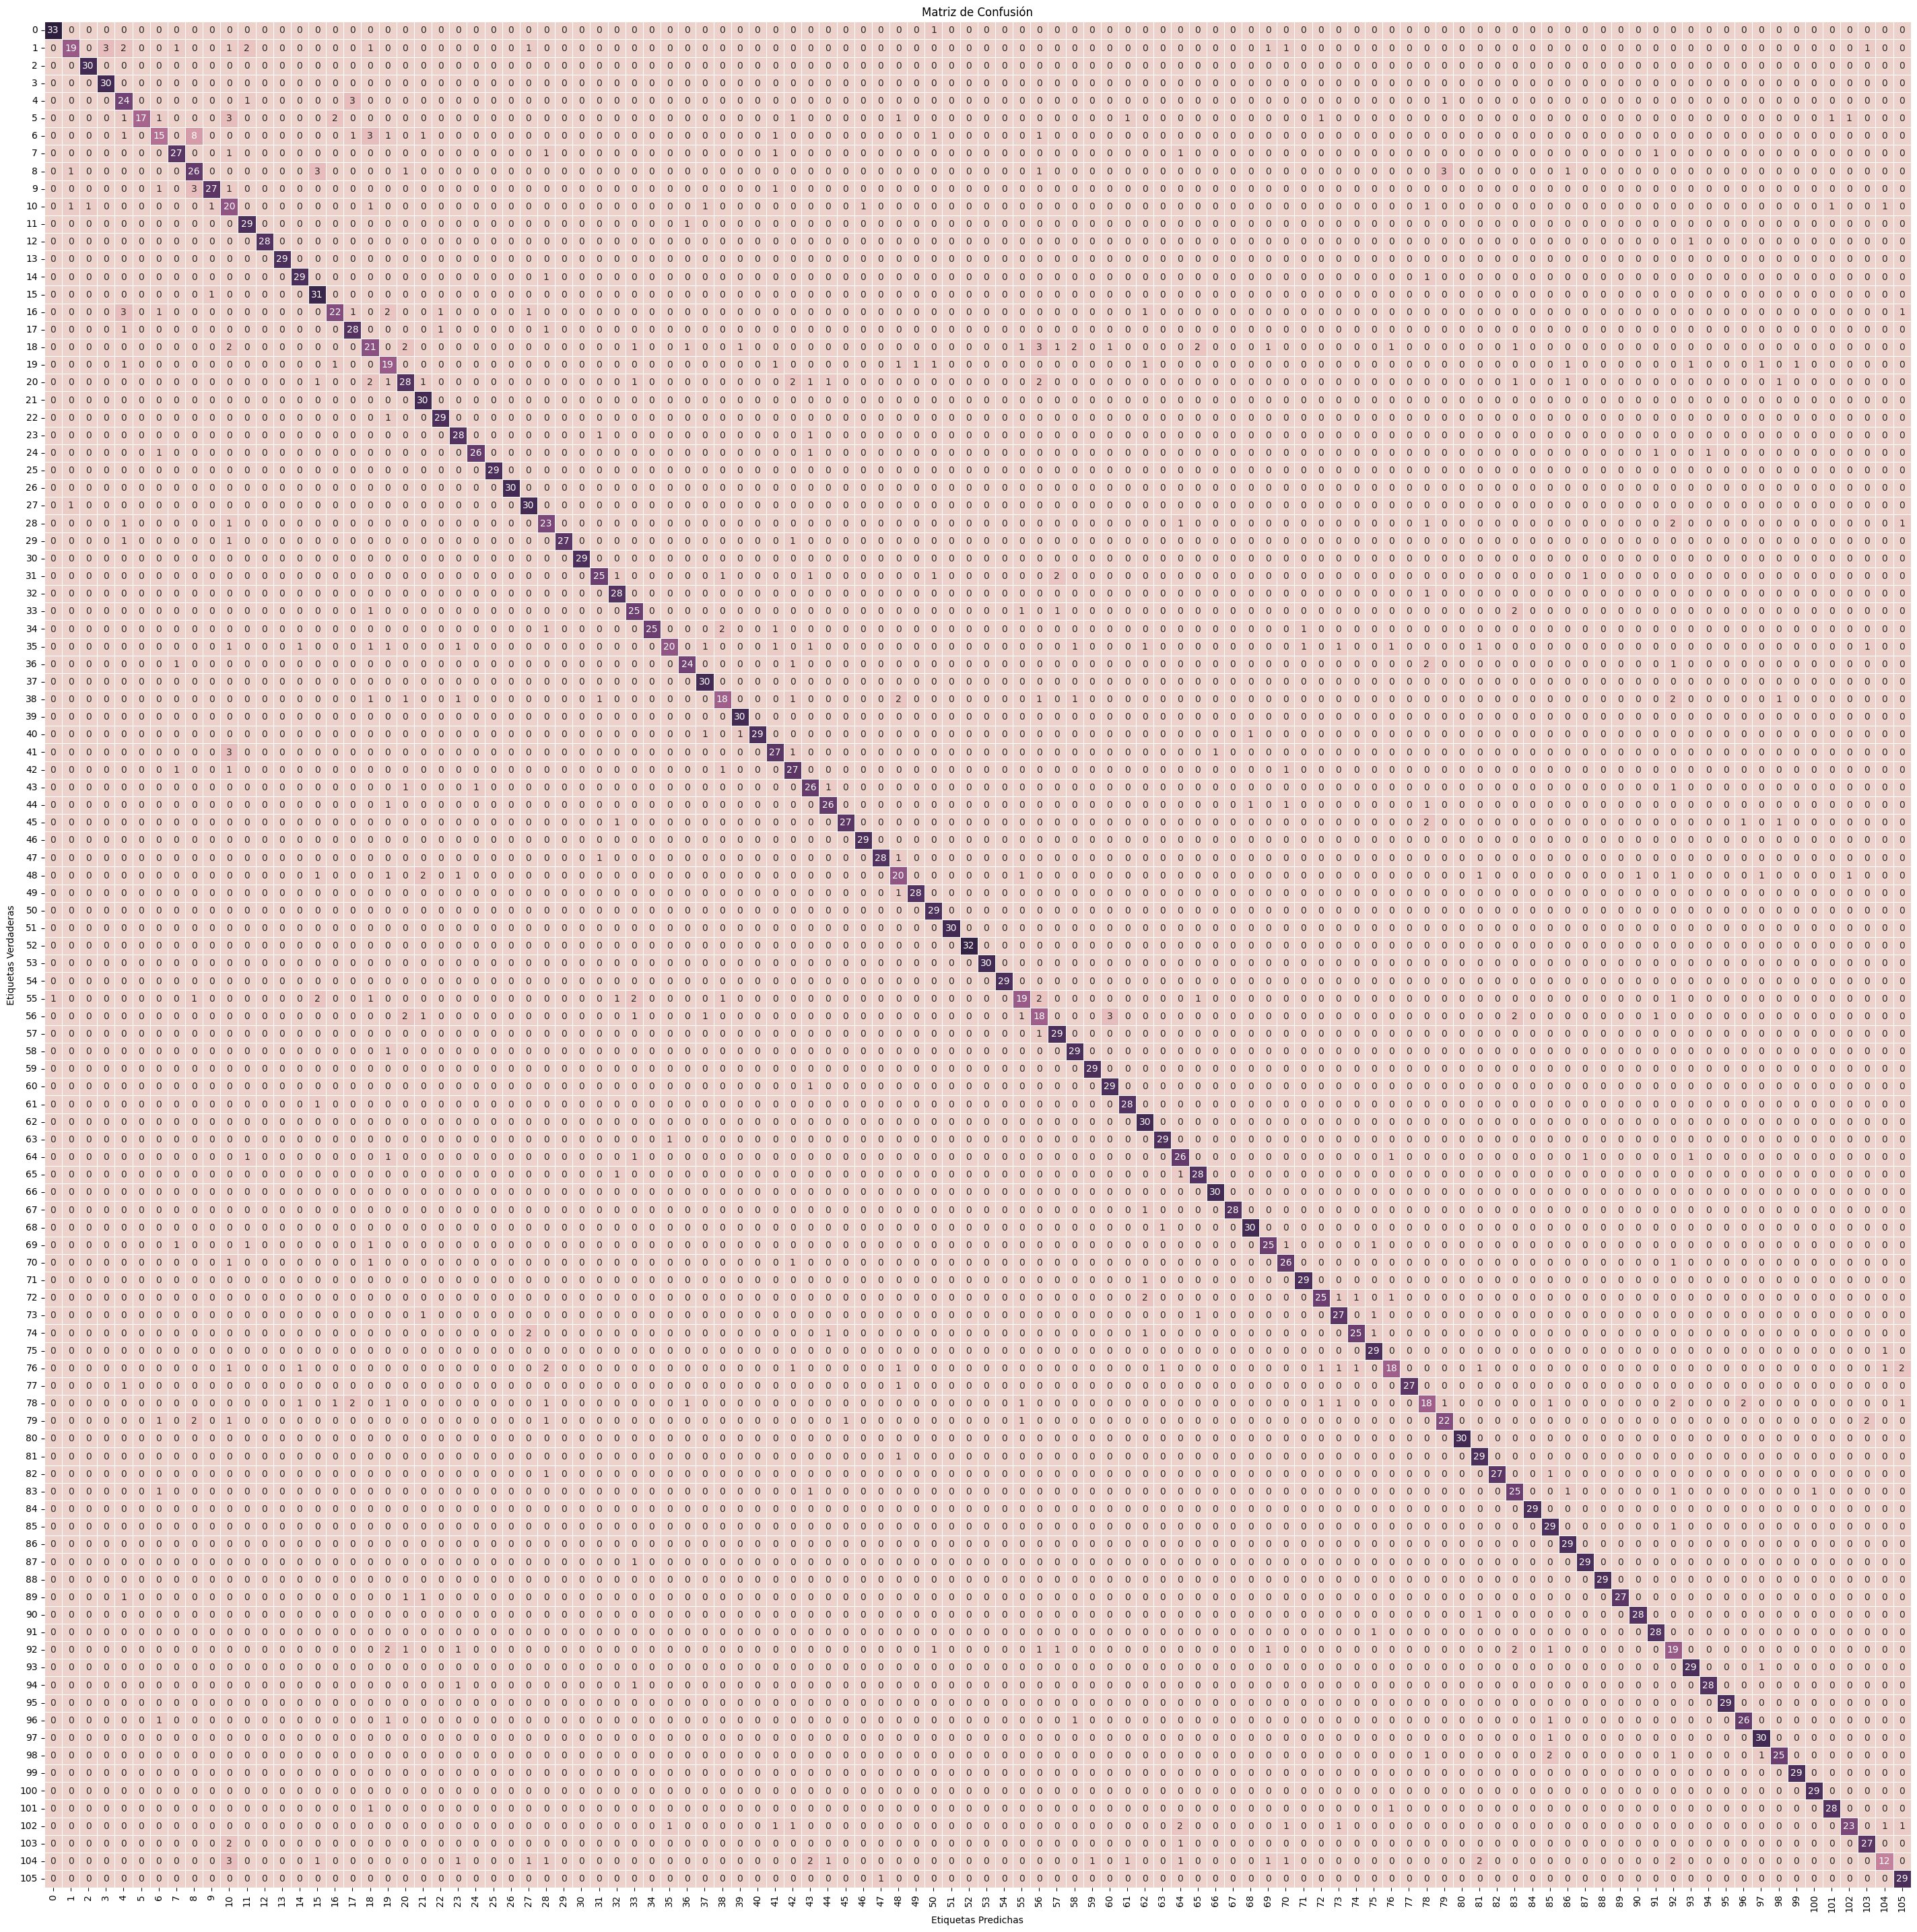

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# las etiquetas verdaderas y predichas
# test_true_labels y test_predicted_labels

C = confusion_matrix(real_labels, predicted_label_cm)

# Ajusta el tamaño de la figura
plt.figure(figsize = (36, 36))

# Utiliza un mapa de colores personalizado
cmap = sns.cubehelix_palette(as_cmap = True)

# Dibuja la matriz de confusión con anotaciones y un borde
sns.heatmap(cm.numpy(), cmap = cmap, square = True, annot = True, fmt = 'd', linewidths = .5, cbar = False)

# Añade etiquetas de los ejes
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')

# Añade un título
plt.title('Matriz de Confusión')

# Muestra el gráfico
plt.show()

In [32]:
#Metricas
from sklearn.metrics import accuracy_score, matthews_corrcoef, balanced_accuracy_score

In [33]:
#Real_labels son las etiquetas reales y predicted_label son las etiquetas predichas por el modelo
accuracy = accuracy_score(real_labels, predicted_label_cm)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8667489204194941


In [34]:
#Real_labels son las etiquetas reales y predicted_label son las etiquetas predichas por el modelo
mcc = matthews_corrcoef(real_labels, predicted_label_cm)
print(f'Matthews Correlation Coefficient: {mcc}')

Matthews Correlation Coefficient: 0.865573350605188


In [35]:
#Real_labels son las etiquetas reales y predicted_label son las etiquetas predichas por el modelo
bal_acc=balanced_accuracy_score(real_labels, predicted_label_cm)
print(f'balanced_accuracy_score: {bal_acc}')

balanced_accuracy_score: 0.8721923596423375


In [36]:
#Guardar el modelo entrenado.
t = time.time()

export_path = "../Models/MInception_x2/{}".format(int(t))
model.save(export_path)


export_path

INFO:tensorflow:Assets written to: Models/MInception_x2/1700007872\assets


INFO:tensorflow:Assets written to: Models/MInception_x2/1700007872\assets


'Models/MInception_x2/1700007872'

In [37]:
#Cargar un modelo previamente guardado
reloaded = tf.keras.models.load_model(export_path)

In [38]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

1/1 [==============================] - 1s 691ms/step


In [39]:
abs(reloaded_result_batch - result_batch).max()

0.0

In [40]:
reloaded_predicted_id = tf.math.argmax(reloaded_result_batch, axis=-1)
reloaded_predicted_label_batch = class_names[reloaded_predicted_id]
print(reloaded_predicted_label_batch)

['080' '031' '049' '044' '039' '085' '033' '036' '002' '058']


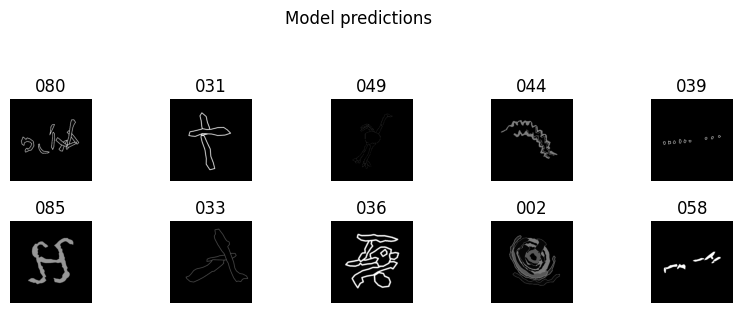

In [42]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(10):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(reloaded_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")